# **Problem** **Description**

InsureNow is a leading commercial Insurance provider with PAN India presence, The
company wants to build a prediction algorithm based on a subset of data from 2002 to
2009.
The company also wants to understand the data characteristics, so that it would help to
negotiate better terms with the clients.

In [1]:
# Load the libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [12, 6]

In [2]:
# Load the dataset
claim_info = pd.read_csv('/content/drive/MyDrive/Hackathon/Insurance_Claim_Info_data.csv')
claim_info.head()

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured
0,DQW1NZO0PL,NSK,Nashik,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material
1,JS5GAPRN5B,BOM,Mumbai,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment
2,ZTSVAQSEAQ,LKO,Lucknow,Public Limited Company,Property Loss,In Transit,Fixtures
3,EW7NWHI7LI,DEL,Delhi,Sole Proprietorship,Property Loss,In Transit,Pumps and Motors
4,UJOFDC41EL,DEL,Delhi,One Person Company,Property Loss,In Transit,Misc. Engineering Tools


In [3]:
# Load the dataset
insurance_date = pd.read_csv('/content/drive/MyDrive/Hackathon/Insurance_Date_data.csv')
insurance_date.head()

,Claim Number,Incident Date,Date Received
0,BCHKRDM32K,21-10-2007,31-10-2007
1,B3GPD5IZQW,26-05-2006,14-06-2006
2,EB757CV6XW,18-01-2004,10-02-2004
3,SP0Z0Q95OV,28-04-2004,06-05-2004
4,VKZUK7J3KK,04-11-2007,14-11-2007


In [4]:
# Load the dataset
insurance_res = pd.read_csv('/content/drive/MyDrive/Hackathon/Insurance_Result_data.csv')
insurance_res.head()

,Claim Number,Claim Amount,Close Amount,Disposition
0,Y5VA9KOE89,100.00,0.00,Deny
1,P51DOJLR8W,199.99,0.00,Deny
2,OUUZFP7EFL,410.00,59.85,Settle
3,CGP3L1CCP2,240.00,0.00,Deny
4,JDFLPD7J9Z,11.36,11.36,Approve in Full


In [5]:
# Load the test dataset
test_data = pd.read_excel('/content/drive/MyDrive/Hackathon/test_data-1663477366404.xlsx')
test_data.head()

,Claim Number,Incident Date,Date Received,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured
0,6EYB31JGFR,21-09-2006,26-12-2006,PNQ,Pune,One Person Company,Property Loss,In Transit,Inventory - Finished Goods
1,HJLRXONE3R,15-01-2009,2009-11-02 00:00:00,PNQ,Pune,Limited Liability Parterneship (LLP),Property Loss,In Transit,Fixtures
2,IUOV99JA22,17-08-2005,2005-01-09 00:00:00,AMD,Ahmedabad,Private Limited Company,Property Loss,Warehouse,Inventory - Raw Material
3,BGOUHQ2LKK,15-02-2005,2005-01-06 00:00:00,DEL,Delhi,One Person Company,Property Damage,In Transit,Inventory - Finished Goods
4,HDCG60QET1,17-03-2003,2003-01-04 00:00:00,PNQ,Pune,Private Limited Company,Property Damage,In Transit,Misc. Electronic Items


In [6]:
# Merge the data
df = claim_info.merge(insurance_date,on='Claim Number')
final_data = df.merge(insurance_res, on = 'Claim Number')
final_data

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Incident Date,Date Received,Claim Amount,Close Amount,Disposition
0,DQW1NZO0PL,NSK,Nashik,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material,25-05-2007,06-07-2007,490.00,0.00,Deny
1,JS5GAPRN5B,BOM,Mumbai,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment,17-09-2006,27-09-2006,300.00,150.00,Settle
2,ZTSVAQSEAQ,LKO,Lucknow,Public Limited Company,Property Loss,In Transit,Fixtures,12-06-2006,17-07-2006,83.98,83.98,Approve in Full
3,EW7NWHI7LI,DEL,Delhi,Sole Proprietorship,Property Loss,In Transit,Pumps and Motors,13-11-2005,05-12-2005,507.88,0.00,Deny
4,UJOFDC41EL,DEL,Delhi,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,28-07-2008,12-08-2008,83.46,41.73,Settle
...,...,...,...,...,...,...,...,...,...,...,...,...
34105,5CFGWQ6IR5,AGR,Agra,Public Limited Company,Property Loss,In Transit,Misc. Engineering Tools,19-12-2005,21-03-2006,238.00,115.60,Settle
34106,QQ6EAWA4Q5,LKO,Lucknow,Partnership Firm,Property Damage,In Transit,Misc. Electronic Items,08-01-2007,16-01-2007,7.00,0.00,Deny
34107,X1J58PT1J5,HYD,Hyderabad,One Person Company,Property Damage,In Transit,Misc. Electronic Items,19-09-2005,18-10-2005,166.00,70.00,Settle
34108,AGOXXE8KII,MAA,Chennai,Sole Proprietorship,Property Damage,Warehouse,Pumps and Motors,14-04-2009,09-09-2009,450.00,280.00,Settle


#**EDA**




In [7]:
# To understand the data type for each of the variables 
final_data.dtypes

Claim Number        object
City Code           object
City                object
Enterprise Type     object
Claim Type          object
Claim Site          object
Product Insured     object
Incident Date       object
Date Received       object
Claim Amount       float64
Close Amount       float64
Disposition         object
dtype: object

In [8]:
# Converting "Incident Date" and "Date Received" dtype from object to dates
#infer_datetime_format is used for consistent parsing with a format dd/mm/year
final_data['Incident Date'] = pd.to_datetime(final_data['Incident Date'],infer_datetime_format=True)
final_data['Date Received'] = pd.to_datetime(final_data['Date Received'],infer_datetime_format=True)

In [9]:
# Check the range of dates in the "Incident Date" and "Date Received" columns
print("Incident Date range:", final_data["Incident Date"].min(), "to", final_data["Incident Date"].max())
print("Date Received range:", final_data["Date Received"].min(), "to", final_data["Date Received"].max())


Incident Date range: 2002-01-10 00:00:00 to 2010-06-22 00:00:00
Date Received range: 1994-05-01 00:00:00 to 2055-05-17 00:00:00


From the range of the incidents we can see that there are dates which are out of range from the date range mentioned by the company. These might be possible error and outliers which might affect our training model and hence to filter the dates between the given range in by the company

In [10]:
# Filter the dataset to only include rows where the year is between 2002 and 2009
final_data = final_data.loc[(final_data['Incident Date'] >= '2002-01-01') & (final_data['Incident Date'] <= '2009-12-31')] [(final_data['Date Received'] >= '2002-01-01') & (final_data['Date Received'] <= '2009-12-31')]
final_data

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Incident Date,Date Received,Claim Amount,Close Amount,Disposition
0,DQW1NZO0PL,NSK,Nashik,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material,2007-05-25,2007-06-07,490.00,0.00,Deny
1,JS5GAPRN5B,BOM,Mumbai,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment,2006-09-17,2006-09-27,300.00,150.00,Settle
2,ZTSVAQSEAQ,LKO,Lucknow,Public Limited Company,Property Loss,In Transit,Fixtures,2006-06-12,2006-07-17,83.98,83.98,Approve in Full
3,EW7NWHI7LI,DEL,Delhi,Sole Proprietorship,Property Loss,In Transit,Pumps and Motors,2005-11-13,2005-05-12,507.88,0.00,Deny
4,UJOFDC41EL,DEL,Delhi,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,2008-07-28,2008-12-08,83.46,41.73,Settle
...,...,...,...,...,...,...,...,...,...,...,...,...
34105,5CFGWQ6IR5,AGR,Agra,Public Limited Company,Property Loss,In Transit,Misc. Engineering Tools,2005-12-19,2006-03-21,238.00,115.60,Settle
34106,QQ6EAWA4Q5,LKO,Lucknow,Partnership Firm,Property Damage,In Transit,Misc. Electronic Items,2007-01-08,2007-01-16,7.00,0.00,Deny
34107,X1J58PT1J5,HYD,Hyderabad,One Person Company,Property Damage,In Transit,Misc. Electronic Items,2005-09-19,2005-10-18,166.00,70.00,Settle
34108,AGOXXE8KII,MAA,Chennai,Sole Proprietorship,Property Damage,Warehouse,Pumps and Motors,2009-04-14,2009-09-09,450.00,280.00,Settle


In [11]:
# To find claim number where the date of incident is greater than date recieved
final_data['days_for_claim_request'] = (final_data['Date Received'] - final_data['Incident Date']).dt.days
final_data

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Incident Date,Date Received,Claim Amount,Close Amount,Disposition,days_for_claim_request
0,DQW1NZO0PL,NSK,Nashik,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material,2007-05-25,2007-06-07,490.00,0.00,Deny,13
1,JS5GAPRN5B,BOM,Mumbai,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment,2006-09-17,2006-09-27,300.00,150.00,Settle,10
2,ZTSVAQSEAQ,LKO,Lucknow,Public Limited Company,Property Loss,In Transit,Fixtures,2006-06-12,2006-07-17,83.98,83.98,Approve in Full,35
3,EW7NWHI7LI,DEL,Delhi,Sole Proprietorship,Property Loss,In Transit,Pumps and Motors,2005-11-13,2005-05-12,507.88,0.00,Deny,-185
4,UJOFDC41EL,DEL,Delhi,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,2008-07-28,2008-12-08,83.46,41.73,Settle,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34105,5CFGWQ6IR5,AGR,Agra,Public Limited Company,Property Loss,In Transit,Misc. Engineering Tools,2005-12-19,2006-03-21,238.00,115.60,Settle,92
34106,QQ6EAWA4Q5,LKO,Lucknow,Partnership Firm,Property Damage,In Transit,Misc. Electronic Items,2007-01-08,2007-01-16,7.00,0.00,Deny,8
34107,X1J58PT1J5,HYD,Hyderabad,One Person Company,Property Damage,In Transit,Misc. Electronic Items,2005-09-19,2005-10-18,166.00,70.00,Settle,29
34108,AGOXXE8KII,MAA,Chennai,Sole Proprietorship,Property Damage,Warehouse,Pumps and Motors,2009-04-14,2009-09-09,450.00,280.00,Settle,148


####There seem to be negative values for days for requesting a claim which is impractical. It would be better to make those values absolute because there might be a chance of swapping incident date and receiving date during data entry.

In [12]:
#count of reporting delay which are in negative
len(final_data.loc[final_data['days_for_claim_request']<0])

5445

In [13]:
# % of negative values in reporting delay
(len(final_data.loc[final_data['days_for_claim_request']<0])/len(final_data))*100

15.965400967600058

We have 16% neagative reporting delay, it is better to take absolute value and swap the incident date and recieving date.

In [14]:
#consider reporting delay above 0
final_data = final_data.loc[final_data['days_for_claim_request']>=0]
final_data

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Incident Date,Date Received,Claim Amount,Close Amount,Disposition,days_for_claim_request
0,DQW1NZO0PL,NSK,Nashik,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material,2007-05-25,2007-06-07,490.00,0.00,Deny,13
1,JS5GAPRN5B,BOM,Mumbai,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment,2006-09-17,2006-09-27,300.00,150.00,Settle,10
2,ZTSVAQSEAQ,LKO,Lucknow,Public Limited Company,Property Loss,In Transit,Fixtures,2006-06-12,2006-07-17,83.98,83.98,Approve in Full,35
4,UJOFDC41EL,DEL,Delhi,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,2008-07-28,2008-12-08,83.46,41.73,Settle,133
5,IXZ4B1B9NO,MAA,Chennai,Private Limited Company,Property Loss,In Transit,Misc. Engineering Tools,2004-09-21,2004-11-16,52.49,52.49,Approve in Full,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34105,5CFGWQ6IR5,AGR,Agra,Public Limited Company,Property Loss,In Transit,Misc. Engineering Tools,2005-12-19,2006-03-21,238.00,115.60,Settle,92
34106,QQ6EAWA4Q5,LKO,Lucknow,Partnership Firm,Property Damage,In Transit,Misc. Electronic Items,2007-01-08,2007-01-16,7.00,0.00,Deny,8
34107,X1J58PT1J5,HYD,Hyderabad,One Person Company,Property Damage,In Transit,Misc. Electronic Items,2005-09-19,2005-10-18,166.00,70.00,Settle,29
34108,AGOXXE8KII,MAA,Chennai,Sole Proprietorship,Property Damage,Warehouse,Pumps and Motors,2009-04-14,2009-09-09,450.00,280.00,Settle,148


In [15]:
#check the shape of data
final_data.shape

(28660, 13)

In [16]:
#Snap shot of data
final_data.tail()

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Incident Date,Date Received,Claim Amount,Close Amount,Disposition,days_for_claim_request
34105,5CFGWQ6IR5,AGR,Agra,Public Limited Company,Property Loss,In Transit,Misc. Engineering Tools,2005-12-19,2006-03-21,238.00,115.60,Settle,92
34106,QQ6EAWA4Q5,LKO,Lucknow,Partnership Firm,Property Damage,In Transit,Misc. Electronic Items,2007-01-08,2007-01-16,7.00,0.00,Deny,8
34107,X1J58PT1J5,HYD,Hyderabad,One Person Company,Property Damage,In Transit,Misc. Electronic Items,2005-09-19,2005-10-18,166.00,70.00,Settle,29
34108,AGOXXE8KII,MAA,Chennai,Sole Proprietorship,Property Damage,Warehouse,Pumps and Motors,2009-04-14,2009-09-09,450.00,280.00,Settle,148
34109,WT5RH23GPC,LKO,Lucknow,Private Ltd. MSME - Medium,Property Loss,In Transit,Inventory - Raw Material,2005-03-19,2005-03-29,70.35,70.35,Approve in Full,10


In [17]:
#descriptive statistics for numerical variables
final_data.describe()

,Claim Amount,Close Amount,days_for_claim_request
count,28660.000000,28660.000000,28660.000000
mean,741.518653,107.883468,71.232694
std,8976.431676,1515.147258,95.268487
min,0.000000,0.000000,0.000000
25%,60.195000,0.000000,16.000000
50%,176.000000,0.000000,33.000000
75%,462.957500,75.000000,87.000000
max,900000.000000,250000.000000,2411.000000


#### From the above descriptive stastistics we can see that the claim amount is 0.The claim amount cannot be zero as there are close amounts and dispositions associated with it.

In [18]:
#describe categorical variables
final_data.describe(include='O')

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Disposition
count,28660,28660,28660,28660,28660,28660,28660,28660
unique,28660,23,23,13,2,3,13,3
top,DQW1NZO0PL,BOM,Mumbai,Sole Proprietorship,Property Loss,In Transit,Inventory - Raw Material,Deny
freq,1,2161,2161,5236,17828,24203,6848,14986


In [19]:
#to check the claim amount which is zero
claim_zero = final_data.loc[final_data['Claim Amount']==0]
print(len(claim_zero))

12


- There around 12 data points which have claim amount zero.
- It is better to impute the claim amount to any value based on the type of Product insured to avoid misinterpretation of the model.
- We can use the mean grouped by the product insured type to impute the zero values for the claim amount

In [20]:
# Calculate the mean of the 'Claim Amount' column for each 'Product Insured' group
product_claim_mean = final_data.groupby('Product Insured')['Claim Amount'].mean()
product_claim_mean

Product Insured
Cameras and other Misc. Security Equipment                   278.477024
Fixtures                                                     186.505745
Furniture                                                   1507.547054
Heating, ventilation, and air conditioning (HVAC) System    3369.372143
Inventory - Finished Goods                                    66.632738
Inventory - Raw Material                                     499.040989
Misc. Electrical Equipment                                   579.088318
Misc. Electronic Items                                       325.549437
Misc. Engineering Tools                                      475.627281
Misc. Lab Equipment                                          846.406326
Misc. Sensors                                                332.033915
Property, Plant, and Equipment (PPE) Parts                   321.923182
Pumps and Motors                                             316.626548
Name: Claim Amount, dtype: float64

In [21]:
# Fill the 0 values in the 'Claim Amount' column with the mean of the corresponding 'Product Insured' group
final_data.loc[final_data['Claim Amount'] == 0, 'Claim Amount'] = final_data[final_data['Claim Amount'] == 0].apply(lambda row: product_claim_mean[row['Product Insured']], axis=1)


In [22]:
#Check the duplicates
duplicates = final_data.duplicated().sum()
print('Total duplicate values:',duplicates)

Total duplicate values: 0


In [23]:
#checking for value counts
for i in final_data.columns:
    print(i,final_data[i].value_counts())

Claim Number DQW1NZO0PL    1
6T1FWAI200    1
VM9VJIC4XP    1
O5S3MN24R1    1
9CGIICEMTA    1
             ..
OI2OGYVTE5    1
JZDBW4S4W4    1
GWQPIEP3A2    1
RXMIJBOG3Y    1
WT5RH23GPC    1
Name: Claim Number, Length: 28660, dtype: int64
City Code BOM    2161
DEL    1947
BLR    1821
HYD    1742
MAA    1460
PNQ    1429
AMD    1419
LKO    1389
CCU    1346
STV    1271
JAI    1180
KNU    1140
NGP    1135
IDR    1083
CJB    1022
BHO     996
THN     984
VSK     913
PAT     910
AGR     861
BDQ     854
NSK     844
ATQ     753
Name: City Code, dtype: int64
City Mumbai           2161
Delhi            1947
Bangalore        1821
Hyderabad        1742
Chennai          1460
Pune             1429
Ahmedabad        1419
Lucknow          1389
Kolkata          1346
Surat            1271
Jaipur           1180
Kanpur           1140
Nagpur           1135
Indore           1083
Coimbatore       1022
Bhopal            996
Thane             984
Visakhapatnam     913
Patna             910
Agra              861
Va

In [24]:
#check for null values
final_data.isnull().sum()

Claim Number              0
City Code                 0
City                      0
Enterprise Type           0
Claim Type                0
Claim Site                0
Product Insured           0
Incident Date             0
Date Received             0
Claim Amount              0
Close Amount              0
Disposition               0
days_for_claim_request    0
dtype: int64

In [25]:
# Calculate the percentage of claim received for each row
final_data['Percent Claim Received'] = round(final_data['Close Amount'] / final_data['Claim Amount']*100,3)
print(f'There are around {len(final_data.loc[final_data["Percent Claim Received"]>100])} data values which have more than 100% settlement amount')



There are around 77 data values which have more than 100% settlement amount


####There are settlement amounts which are more than 100% which is strange but have to considered as bank already have processed the amount.

In [26]:
# Filter the data to include only settled claims
settled_claims = final_data[final_data['Disposition'] == 'Settle']

# Calculate the average percentage of claim received for settled claims
average_percent_claim_received = settled_claims['Percent Claim Received'].mean()

print("The average % of claims received when the claim is settled is:", round(average_percent_claim_received,2), "%")

The average % of claims received when the claim is settled is: 50.34 %


In [27]:
# Calculate the reporting delay in days
final_data['Reporting Delay in Days'] = (final_data['Date Received'] - final_data['Incident Date']).dt.days

# Group the data by 'Product' and calculate the mean of the reporting delay for each product
reporting_delay_by_product = final_data.groupby('Product Insured')['Reporting Delay in Days'].mean()

# Print the product with the highest reporting delay
print(reporting_delay_by_product.idxmax(), "has the highest delay in reporting, with an average delay of", round(reporting_delay_by_product.max(), 2), "days.")


Misc. Electronic Items has the highest delay in reporting, with an average delay of 78.71 days.


In [28]:
# frequency of each disposition type
disposition_freq = final_data['Disposition'].value_counts()
print('Disposition frequency:\n', disposition_freq)

Disposition frequency:
 Deny               14986
Approve in Full     7604
Settle              6070
Name: Disposition, dtype: int64


# Visualization


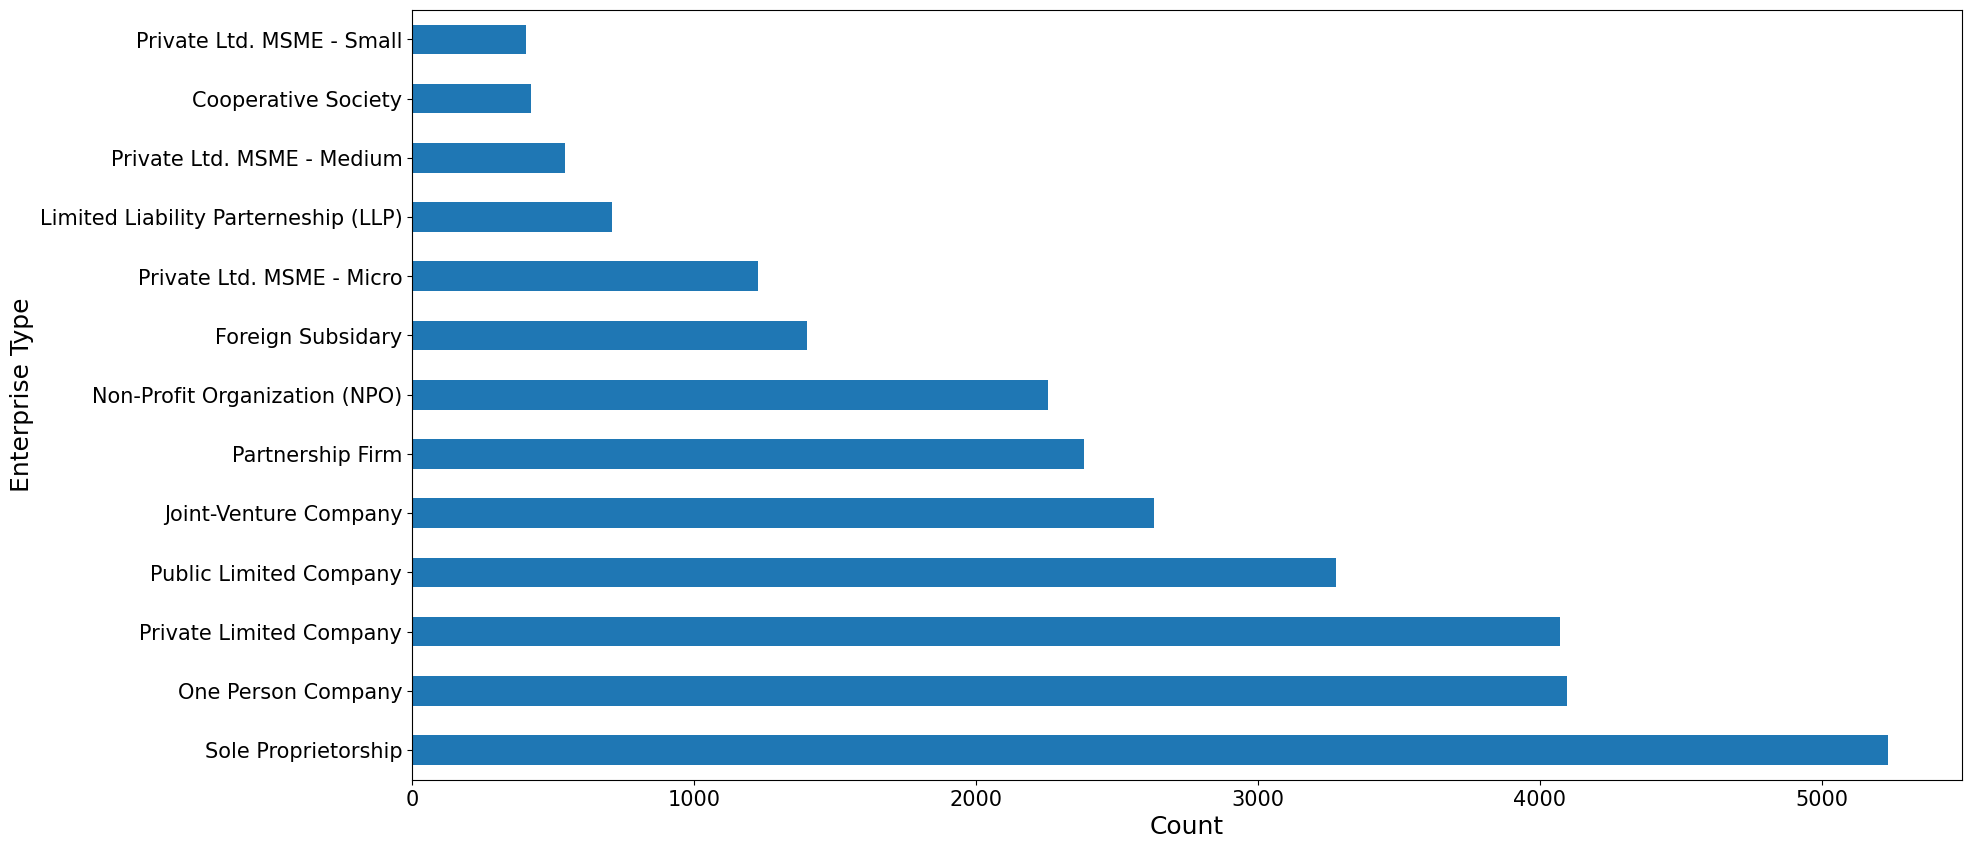

In [29]:
# plotting frequency graph for 'Enterprise Type'
plt.figure(figsize=(20,10))
final_data.groupby('Enterprise Type')['Enterprise Type'].count().sort_values(ascending=False).plot(kind='barh')
plt.xlabel('Count',fontsize=18)
plt.ylabel('Enterprise Type',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()


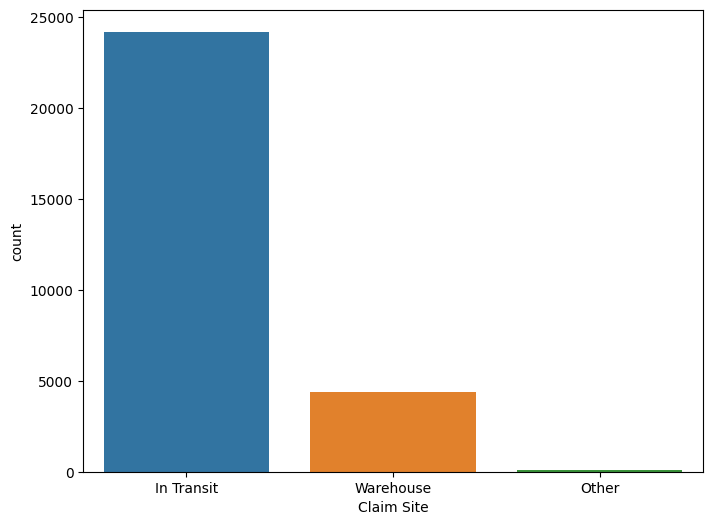

In [30]:
# plotting frequency graph for 'Claim Site'
plt.figure(figsize=(8,6))
sns.countplot(data=final_data, x='Claim Site')
plt.show()

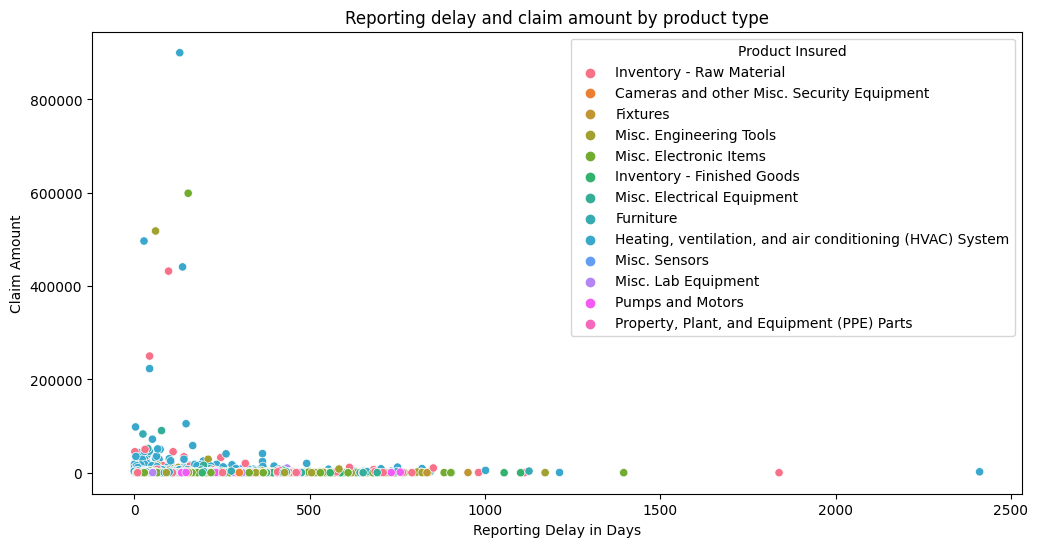

In [31]:
# scatterplot to examine the relationship between reporting delay and claim amount by product type
sns.scatterplot(x='Reporting Delay in Days', y='Claim Amount', hue='Product Insured', data=final_data)
plt.title('Reporting delay and claim amount by product type')
plt.show()

- From the above plot we can see that all the data points are clustered at one place.
- The plot shows that there is no clear relationship between the reporting delay and the claim amount for any product insured. 
- The scatter plot points are parallel to x-axis, indicating that there is no correlation between the two variables. 
- However, we can see that some products insured have a wider range of claim amounts and reporting delays than others. 


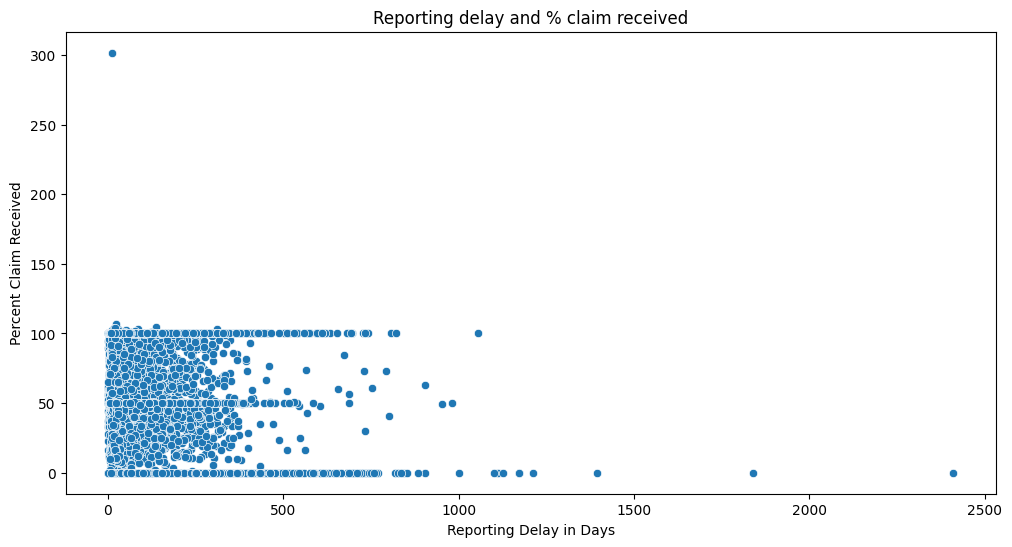

In [32]:
# Calculate the percent claim received
final_data['Percent Claim Received'] = final_data['Close Amount'] / final_data['Claim Amount'] * 100

# Create a scatterplot to examine the relationship between reporting delay and % claim received
sns.scatterplot(x='Reporting Delay in Days', y='Percent Claim Received', data=final_data)
plt.title('Reporting delay and % claim received')
plt.show()

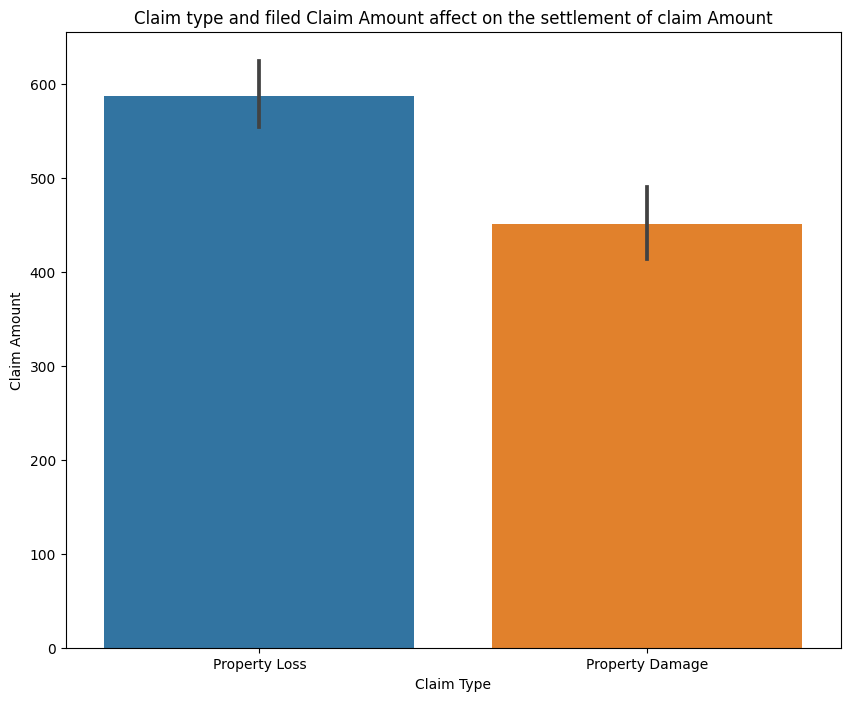

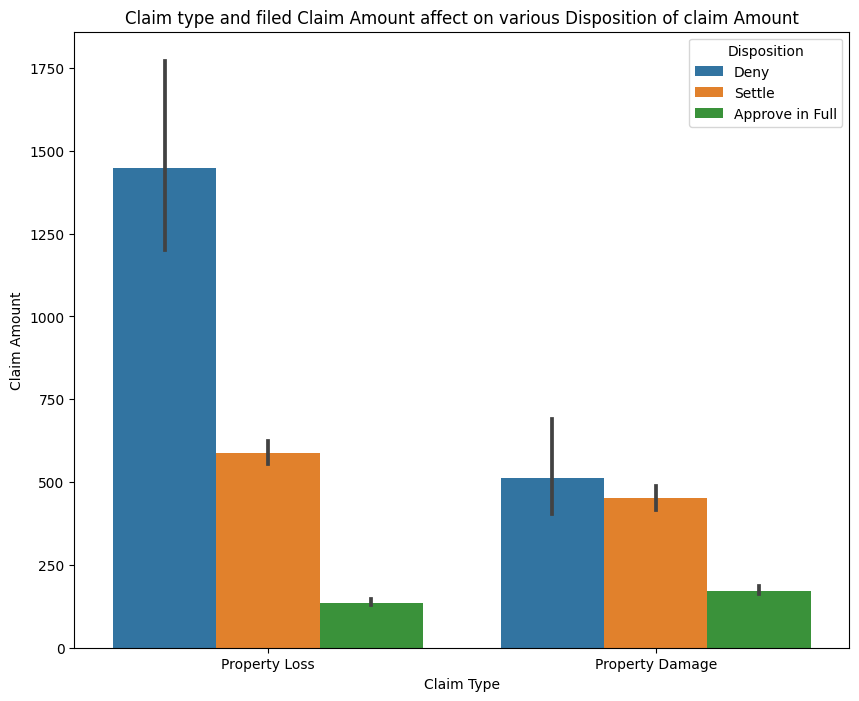

In [33]:
# How claim type and filed Claim Amount could affect the settlement of claim Amount?
plt.figure(figsize=(10,8))
sns.barplot(data=settled_claims, x='Claim Type',y='Claim Amount')
plt.title('Claim type and filed Claim Amount affect on the settlement of claim Amount')
plt.show()

# How claim type and filed Claim Amount could affect various Disposition of claim Amount?
plt.figure(figsize=(10,8))
sns.barplot(data=final_data, x='Claim Type',y='Claim Amount', hue='Disposition')
plt.title('Claim type and filed Claim Amount affect on various Disposition of claim Amount')
plt.show()

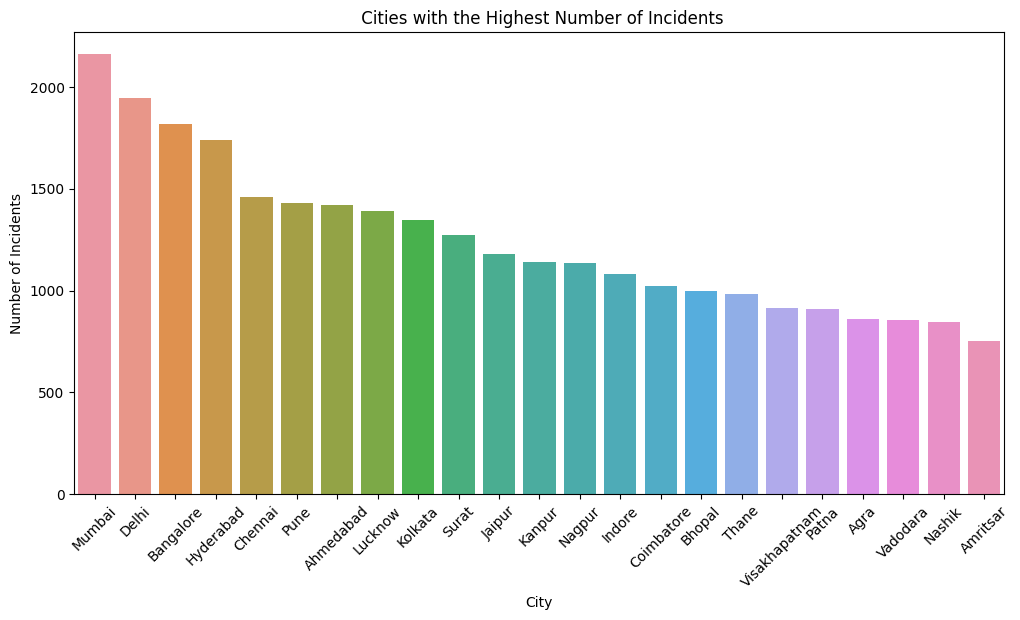

In [34]:
# Group the data by city and count the number of incidents
incidents_by_city = final_data.groupby('City')['Claim Number'].count().sort_values(ascending=False)

# Create a bar chart of the top 10 cities
sns.barplot(x=incidents_by_city.index, y=incidents_by_city.values)

# Add labels and title to the plot
plt.xlabel('City')
plt.ylabel('Number of Incidents')
plt.title(' Cities with the Highest Number of Incidents')


plt.xticks(rotation=45)
plt.show()


The above plot shows the number of incidents reported in each city.
- We can see that certain cities have a higher number of incidents than others, suggesting that the likelihood of filing an insurance claim may be higher in those cities. 
- This information could be useful for insurance companies in terms of setting premiums or assessing risk.
- Mumbai has the highest number of incidents followed by Delhi and Bangalore


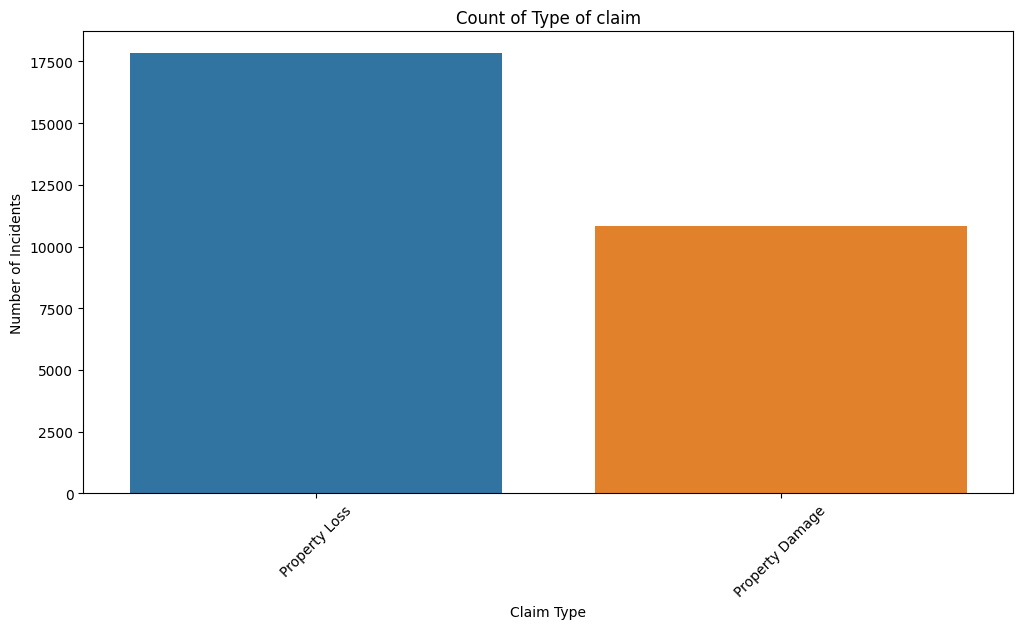

In [35]:
# Group the data by city and count the number of incidents
incidents_by_claim_type = final_data.groupby('Claim Type')['Claim Number'].count().sort_values(ascending=False)

# Create a bar chart of the top 10 cities
sns.barplot(x=incidents_by_claim_type.index, y=incidents_by_claim_type.values)

# Add labels and title to the plot
plt.xlabel('Claim Type')
plt.ylabel('Number of Incidents')
plt.title('Count of Type of claim')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()


The above plot shows the number of incidents by claim type.
- We can see that some claim types have a higher number of incidents than others, indicating that some types of incidents are more common than others. 
- This information could be useful for insurance companies in terms of prioritizing their claims handling processes or determining which types of claims are most likely to require additional resources or attention. 
- We can see that property loss has highest count

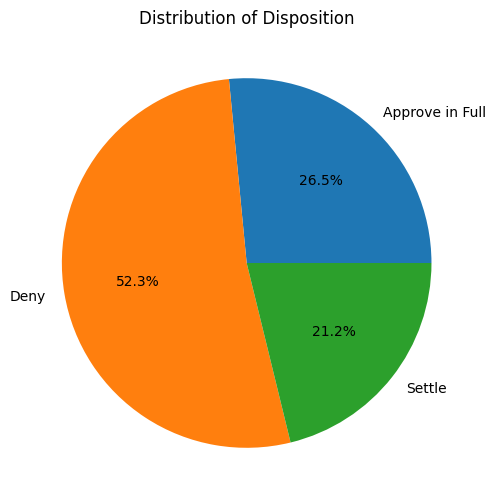

In [36]:
# Group the data by 'Disposition' and calculate the count of each category
disposition_counts = final_data.groupby('Disposition')['Claim Number'].count()

# Create a pie chart
plt.pie(disposition_counts, labels=disposition_counts.index, autopct='%1.1f%%')

# Add a title to the plot
plt.title('Distribution of Disposition')

# Show the plot
plt.show()


- The code creates a pie chart that shows the distribution of disposition categories in the dataset.
- From the pie chart, we can see that the majority of the claims were deny (52..8%), while a small proportion were settle (20.8%) and approve in full (26.4%). - This suggests that most of the claims that were filed were not legitimate and resulted in cancelling of payment to the policyholder.
- This information could be useful for insurance companies in terms of understanding the types of claims that are being filed and how they are being settled. 


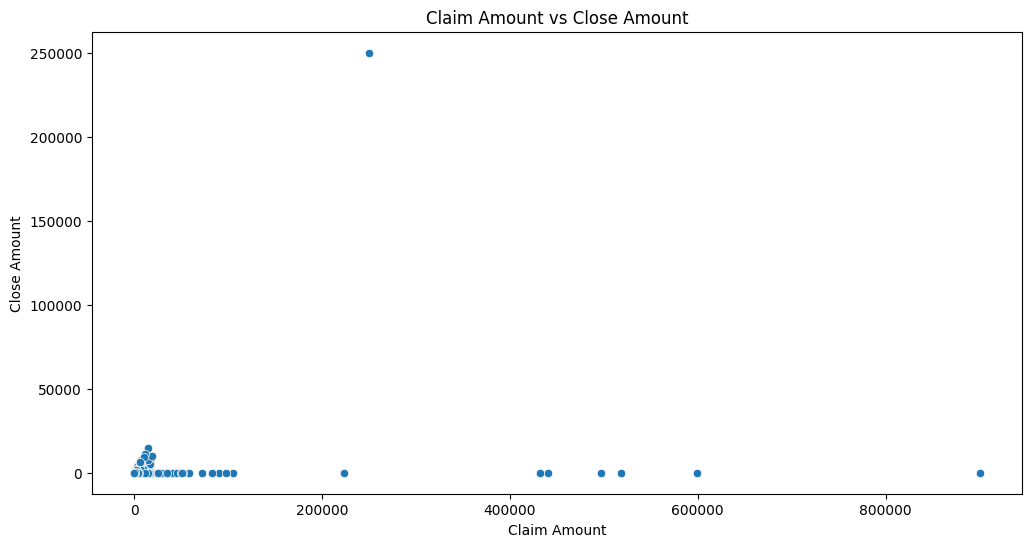

In [37]:
# Claim Amount vs Close Amount
sns.scatterplot(data=final_data, x="Claim Amount", y="Close Amount")
plt.title("Claim Amount vs Close Amount")
plt.show()

- From the we can see that most data points lie in 5000 range for clain amount and close amount is almost half the claim amount for that point. 
- And few points are are spread where the claim amount is very high but the close amount is zero or very less.
- This shows that those points might not have a proper reason for the claim or company would have denied it.

# Data Preprocessing

In [38]:
# duplicating the original data for preprocessing
data = final_data.copy()
data.head()

,Claim Number,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Incident Date,Date Received,Claim Amount,Close Amount,Disposition,days_for_claim_request,Percent Claim Received,Reporting Delay in Days
0,DQW1NZO0PL,NSK,Nashik,Public Limited Company,Property Loss,In Transit,Inventory - Raw Material,2007-05-25,2007-06-07,490.00,0.00,Deny,13,0.0,13
1,JS5GAPRN5B,BOM,Mumbai,One Person Company,Property Loss,In Transit,Cameras and other Misc. Security Equipment,2006-09-17,2006-09-27,300.00,150.00,Settle,10,50.0,10
2,ZTSVAQSEAQ,LKO,Lucknow,Public Limited Company,Property Loss,In Transit,Fixtures,2006-06-12,2006-07-17,83.98,83.98,Approve in Full,35,100.0,35
4,UJOFDC41EL,DEL,Delhi,One Person Company,Property Loss,In Transit,Misc. Engineering Tools,2008-07-28,2008-12-08,83.46,41.73,Settle,133,50.0,133
5,IXZ4B1B9NO,MAA,Chennai,Private Limited Company,Property Loss,In Transit,Misc. Engineering Tools,2004-09-21,2004-11-16,52.49,52.49,Approve in Full,56,100.0,56


In [39]:
# Dropping unwanted columns
clean_data = data.drop(['days_for_claim_request','Claim Number','City','Incident Date','Date Received','Claim Amount','Close Amount','Percent Claim Received'],axis=1)

- reporting_delay is dropped as it was repeated in the column.
- Claim number is dropped as it does not affect the model while predcting.
- Incident date is dropped as it is in date time format we wont be able to fit it in the model, also it's not possible to encode the date as they are unique values.
- Date Recieved is dropped as it is in date time format and we wont be able to fit it in  model, also it's not possible to encode the date as they are unique values.
- Claim amount and closed amount are dropped as they are not present in the sample data and fitting the data would not be possible.

In [40]:
#Encode categorical columns to numeric
from sklearn.preprocessing import LabelEncoder
cat_cols = clean_data.select_dtypes(include='O').columns.tolist()
cat_cols
encoder = LabelEncoder()
for i in cat_cols:
    clean_data[i]=encoder.fit_transform(clean_data[i])

In [41]:
#using train test split
from sklearn.model_selection import train_test_split
x = clean_data.drop(['Disposition'], axis=1)
y = clean_data['Disposition']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3,stratify=y)

# Model Building 


# Decision Tree Classifier

Train Accuracy: 95.2%
Test Accuracy: 43.71%

Recall Score: 0.437078390323331
Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.37      0.36      2281
           1       0.56      0.55      0.56      4496
           2       0.24      0.23      0.24      1821

    accuracy                           0.44      8598
   macro avg       0.38      0.39      0.38      8598
weighted avg       0.44      0.44      0.44      8598



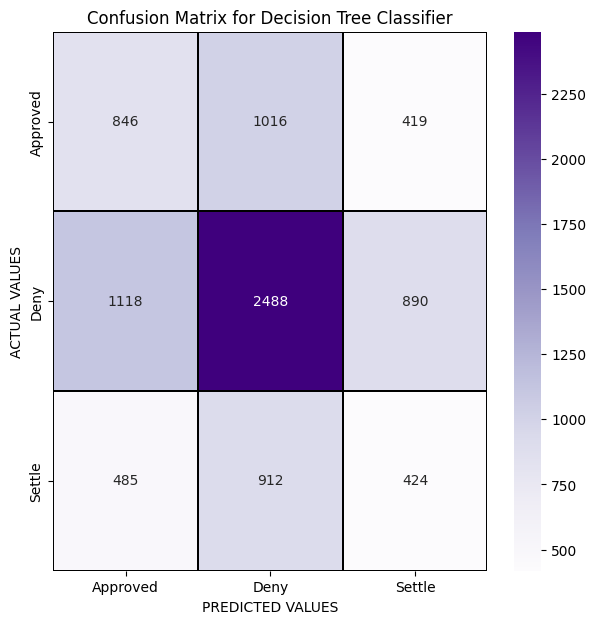

In [42]:
# import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  confusion_matrix, classification_report, recall_score, accuracy_score

# create an instance of the Decision Tree algorithm
dt = DecisionTreeClassifier()

# fit the training data to the algorithm
dt.fit(x_train, y_train)


print('Train Accuracy: {}%'.format(round(dt.score(x_train, y_train)*100,2)))
print("Test Accuracy: {}%".format(round(dt.score(x_test, y_test)*100,2)))
print()

# use the algorithm to predict the y_test values
y_pred = dt.predict(x_test)

# evaluate the performance of the algorithm
print('Recall Score:', recall_score(y_test,y_pred,average='micro'))
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test,y_pred)
x_axis_labels = ['Approved','Deny','Settle']
y_axis_labels = ['Approved','Deny','Settle']
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED VALUES")
plt.ylabel("ACTUAL VALUES")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

### Hyper Parameter Tuning for Decision Tree

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter grid for hyperparameter tuning
# param_dist = {"max_depth": [3, None],
#               "max_features": randint(1, 10),
#               "min_samples_leaf": randint(1, 10),
#               "criterion": ["gini", "entropy"]}
param_dist = {'max_depth': range(1,20),
              "max_features": range(1, 10),
          'max_leaf_nodes':range(1,20),
          'min_samples_leaf':range(2,30),
          'min_samples_split':range(4,40),
          'criterion':['gini','entropy']}

# Create a RandomizedSearchCV object with 5-fold cross-validation
random_search = RandomizedSearchCV(dt, param_dist, n_iter=10, cv=5)

# Fit the model on the training data
random_search.fit(x_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", random_search.best_params_)

Best Parameters:  {'min_samples_split': 27, 'min_samples_leaf': 29, 'max_leaf_nodes': 14, 'max_features': 7, 'max_depth': 6, 'criterion': 'gini'}


### Model After using Best parameters

Train Accuracy: 54.74%
Test Accuracy: 53.86%

Recall Score: 0.5386136310769947
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.27      0.35      2281
           1       0.56      0.88      0.68      4496
           2       0.30      0.03      0.06      1821

    accuracy                           0.54      8598
   macro avg       0.45      0.39      0.36      8598
weighted avg       0.48      0.54      0.46      8598



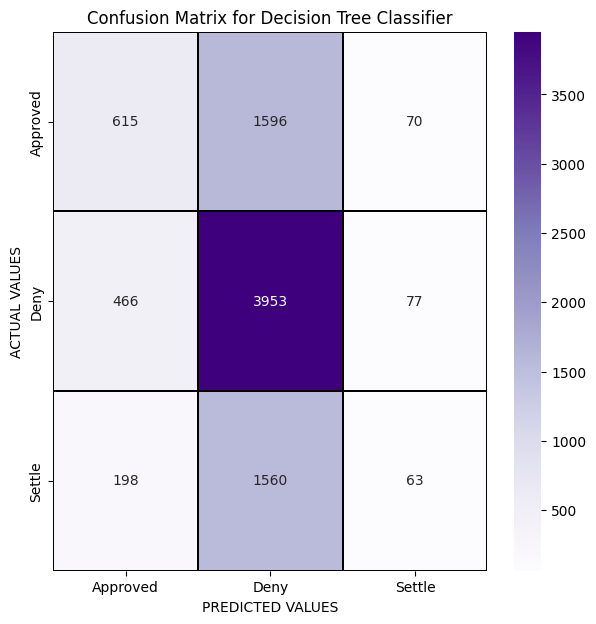

In [43]:
dt = DecisionTreeClassifier(criterion= 'gini', max_depth=6, max_features= 6, min_samples_leaf= 19, min_samples_split= 38, max_leaf_nodes = 16)

# fit the training data to the algorithm
dt.fit(x_train, y_train)

dt_acc = round(dt.score(x_test, y_test)*100,2)
print('Train Accuracy: {}%'.format(round(dt.score(x_train, y_train)*100,2)))
print("Test Accuracy: {}%".format(round(dt.score(x_test, y_test)*100,2)))
print()


# use the algorithm to predict the y_test values
y_pred = dt.predict(x_test)
rf_recall = recall_score(y_test,y_pred,average='micro')

# evaluate the performance of the algorithm
print('Recall Score:', recall_score(y_test,y_pred,average='micro'))
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test,y_pred)
x_axis_labels = ['Approved','Deny','Settle']
y_axis_labels = ['Approved','Deny','Settle']
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED VALUES")
plt.ylabel("ACTUAL VALUES")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

# Naive Bayes Classifier

Train Accuracy: 50.15%
Test Accuracy: 49.92%

Recall Score: 0.4991858571760875
Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.17      0.22      2281
           1       0.53      0.87      0.66      4496
           2       1.00      0.00      0.00      1821

    accuracy                           0.50      8598
   macro avg       0.61      0.35      0.29      8598
weighted avg       0.57      0.50      0.40      8598



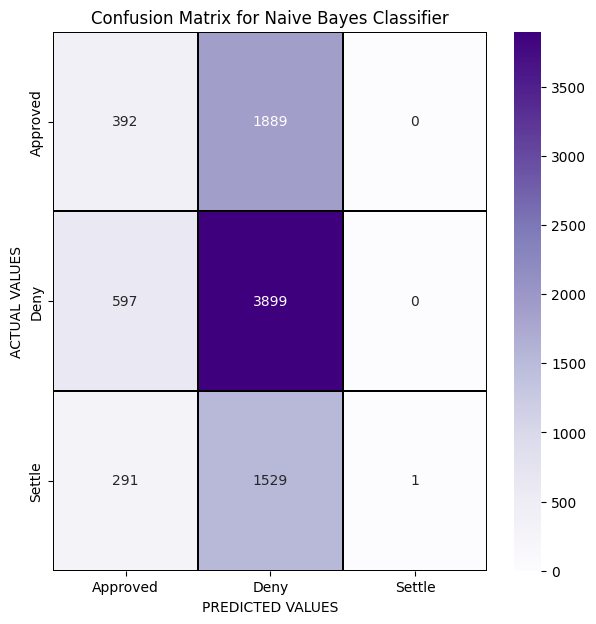

In [44]:
# Import necessary libraries
from sklearn.naive_bayes import MultinomialNB

# Initialize the classifier
nb = MultinomialNB()

# Train the classifier on the training data
nb.fit(x_train, y_train)

nb_acc = round(nb.score(x_test, y_test)*100,2)
print('Train Accuracy: {}%'.format(round(nb.score(x_train, y_train)*100,2)))
print("Test Accuracy: {}%".format(round(nb.score(x_test, y_test)*100,2)))
print()

# Make predictions on the testing data
y_pred = nb.predict(x_test)
nb_recall = recall_score(y_test,y_pred,average='micro')

# evaluate the performance of the algorithm
print('Recall Score:', recall_score(y_test,y_pred,average='micro'))
print("Classification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test,y_pred)
x_axis_labels = ['Approved','Deny','Settle']
y_axis_labels = ['Approved','Deny','Settle']
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED VALUES")
plt.ylabel("ACTUAL VALUES")
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()


# Logistic Regression

Train Accuracy: 53.12%
Test Accuracy: 53.12%

Recall Score: 0.53117003954408
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.07      0.12      2281
           1       0.53      0.98      0.69      4496
           2       0.00      0.00      0.00      1821

    accuracy                           0.53      8598
   macro avg       0.34      0.35      0.27      8598
weighted avg       0.41      0.53      0.39      8598



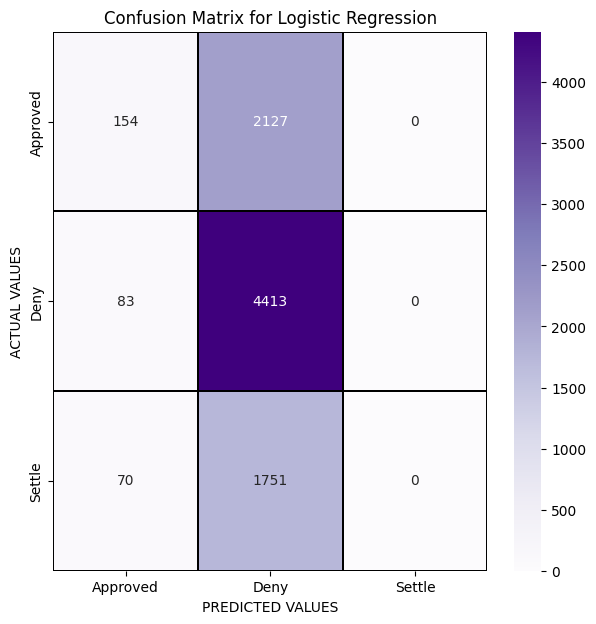

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  confusion_matrix, classification_report, recall_score
# Create a logistic regression classifier
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Train the classifier on the training data
logreg.fit(x_train, y_train)

print('Train Accuracy: {}%'.format(round(logreg.score(x_train, y_train)*100,2)))
print("Test Accuracy: {}%".format(round(logreg.score(x_test, y_test)*100,2)))
print()

# Predict the class labels for the test data
y_pred = logreg.predict(x_test)

# evaluate the performance of the algorithm
print('Recall Score:', recall_score(y_test,y_pred,average='micro'))
print("Classification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test,y_pred)
x_axis_labels = ['Approved','Deny','Settle']
y_axis_labels = ['Approved','Deny','Settle']
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED VALUES")
plt.ylabel("ACTUAL VALUES")
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


### Hyper Parameter Tuning for Logistic Regression

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the logistic regression model
logreg = LogisticRegression()

# Define the hyperparameter grid for tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga']
}

# Perform grid search with cross-validation
random_search = RandomizedSearchCV(logreg, param_grid, cv=5)

# Fit the grid search to the training data
random_search.fit(x_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validation score
print("Best hyperparameters: ", random_search.best_params_)


Best hyperparameters:  {'solver': 'lbfgs', 'penalty': 'l2', 'C': 100}


Model After using Best parameters

Train Accuracy: 52.79%
Test Accuracy: 52.71%

Recall Score: 0.5270993254245173
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.03      0.06      2281
           1       0.53      0.99      0.69      4496
           2       0.00      0.00      0.00      1821

    accuracy                           0.53      8598
   macro avg       0.35      0.34      0.25      8598
weighted avg       0.41      0.53      0.38      8598



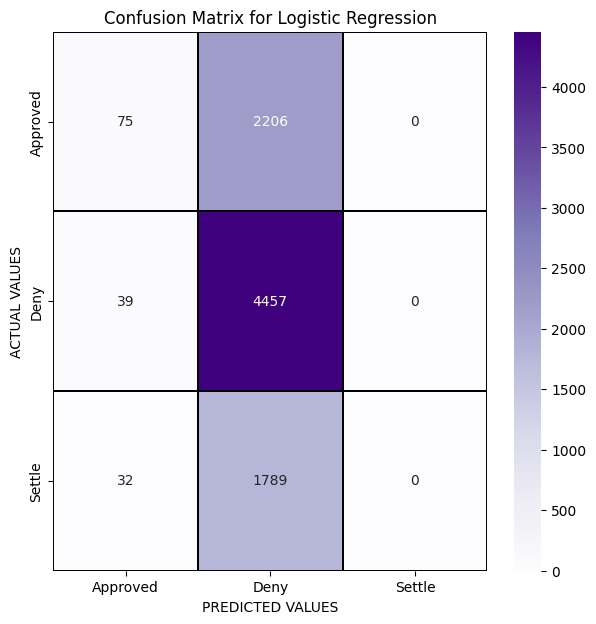

In [46]:
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2',C=100)

# Train the classifier on the training data
logreg.fit(x_train, y_train)

log_acc = round(logreg.score(x_test, y_test)*100,2)
print('Train Accuracy: {}%'.format(round(logreg.score(x_train, y_train)*100,2)))
print("Test Accuracy: {}%".format(round(logreg.score(x_test, y_test)*100,2)))
print()

# Predict the class labels for the test data
y_pred = logreg.predict(x_test)

# evaluate the performance of the algorithm
print('Recall Score:', recall_score(y_test,y_pred,average='micro'))
print("Classification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test,y_pred)
x_axis_labels = ['Approved','Deny','Settle']
y_axis_labels = ['Approved','Deny','Settle']
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED VALUES")
plt.ylabel("ACTUAL VALUES")
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# Random Forest Classifier


Train Accuracy: 95.2%
Test Accuracy: 47.76%

Recall Score: 0.4775529192835543
Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.34      0.36      2281
           1       0.57      0.66      0.61      4496
           2       0.26      0.20      0.22      1821

    accuracy                           0.48      8598
   macro avg       0.41      0.40      0.40      8598
weighted avg       0.46      0.48      0.46      8598



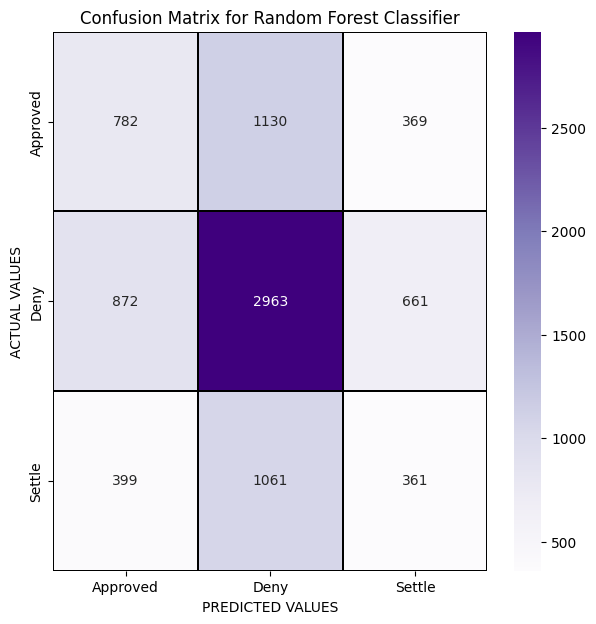

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  confusion_matrix, classification_report, recall_score
# Create a logistic regression classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf.fit(x_train, y_train)

print('Train Accuracy: {}%'.format(round(rf.score(x_train, y_train)*100,2)))
print("Test Accuracy: {}%".format(round(rf.score(x_test, y_test)*100,2)))
print()

# Predict the class labels for the test data
y_pred = rf.predict(x_test)

# evaluate the performance of the algorithm
print('Recall Score:', recall_score(y_test,y_pred,average='micro'))
print("Classification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test,y_pred)
x_axis_labels = ['Approved','Deny','Settle']
y_axis_labels = ['Approved','Deny','Settle']
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED VALUES")
plt.ylabel("ACTUAL VALUES")
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()


### Hyper Parameter Tuning for Random Forest Classifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': range(3,1000),
    'max_depth': range(5,800),
    'min_samples_split': range(2,700),
    'min_samples_leaf': range(1,630)
}


# Perform grid search with 5-fold cross validation
grid_search = RandomizedSearchCV(rf, param_grid, cv=5, n_jobs=-1)

# Fit the model to the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best hyperparameters:", grid_search.best_params_)


Best hyperparameters: {'n_estimators': 396, 'min_samples_split': 132, 'min_samples_leaf': 16, 'max_depth': 329}


Model After using Best parameters

Train Accuracy: 55.62%
Test Accuracy: 54.21%

Recall Score: 0.5421028146080484
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.24      0.33      2281
           1       0.55      0.91      0.69      4496
           2       0.27      0.01      0.01      1821

    accuracy                           0.54      8598
   macro avg       0.44      0.39      0.34      8598
weighted avg       0.48      0.54      0.45      8598



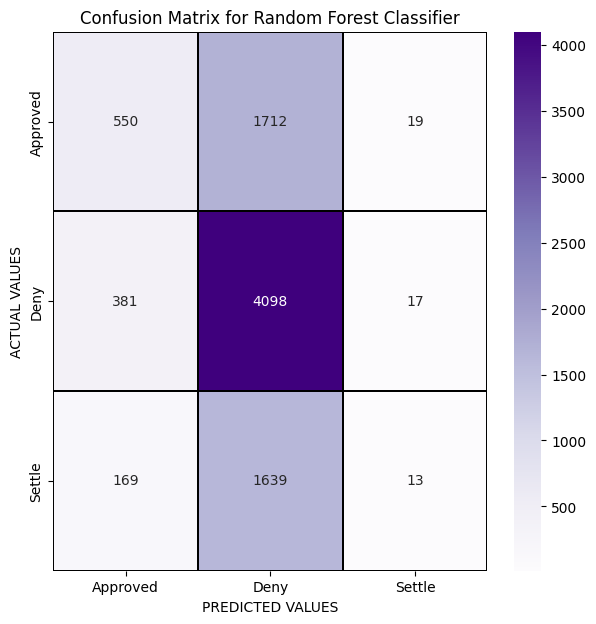

In [48]:
rf = RandomForestClassifier(n_estimators=396, min_samples_split=132, min_samples_leaf=16, max_depth= 329,random_state=42)

# Train the classifier on the training data
rf.fit(x_train, y_train)

rf_acc = round(rf.score(x_test, y_test)*100,2)
print('Train Accuracy: {}%'.format(round(rf.score(x_train, y_train)*100,2)))
print("Test Accuracy: {}%".format(round(rf.score(x_test, y_test)*100,2)))
print()

# Predict the class labels for the test data
y_pred = rf.predict(x_test)

# evaluate the performance of the 
print('Recall Score:', recall_score(y_test,y_pred,average='micro'))
print("Classification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test,y_pred)
x_axis_labels = ['Approved','Deny','Settle']
y_axis_labels = ['Approved','Deny','Settle']
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED VALUES")
plt.ylabel("ACTUAL VALUES")
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

# KNearestNeighbour

Train Accuracy: 62.05%
Test Accuracy: 45.18%

Recall Score: 0.45184926727145847
Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.35      0.33      2281
           1       0.55      0.65      0.60      4496
           2       0.24      0.09      0.13      1821

    accuracy                           0.45      8598
   macro avg       0.36      0.36      0.35      8598
weighted avg       0.42      0.45      0.42      8598



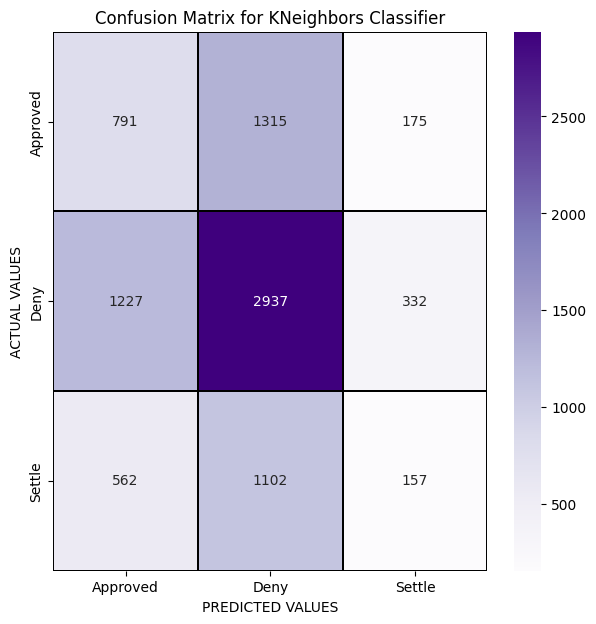

In [49]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN Classifier object
knn = KNeighborsClassifier()

# Fit the model on the training data
knn.fit(x_train, y_train)

print('Train Accuracy: {}%'.format(round(knn.score(x_train, y_train)*100,2)))
print("Test Accuracy: {}%".format(round(knn.score(x_test, y_test)*100,2)))
print()

# Use the model to make predictions on the testing data
y_pred = knn.predict(x_test)

# Calculate the accuracy of the model
print('Recall Score:', recall_score(y_test,y_pred,average='micro'))
print("Classification Report:\n", classification_report(y_test, y_pred))

#Confusion Matrix
cm = confusion_matrix(y_test,y_pred)
x_axis_labels = ['Approved','Deny','Settle']
y_axis_labels = ['Approved','Deny','Settle']
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED VALUES")
plt.ylabel("ACTUAL VALUES")
plt.title('Confusion Matrix for KNeighbors Classifier')
plt.show()


### Hyper Parameter Tuning for KNN

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid to search
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}


# Create a RandomSearchCV object
grid_search = RandomizedSearchCV(knn, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validated score
print("Best parameters:", grid_search.best_params_)


Best parameters: {'weights': 'uniform', 'n_neighbors': 9}


Model After using Best parameters

Train Accuracy: 58.25%
Test Accuracy: 46.99%

Recall Score: 0.4698767155152361
Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.28      0.30      2281
           1       0.54      0.72      0.62      4496
           2       0.26      0.09      0.13      1821

    accuracy                           0.47      8598
   macro avg       0.37      0.36      0.35      8598
weighted avg       0.42      0.47      0.43      8598



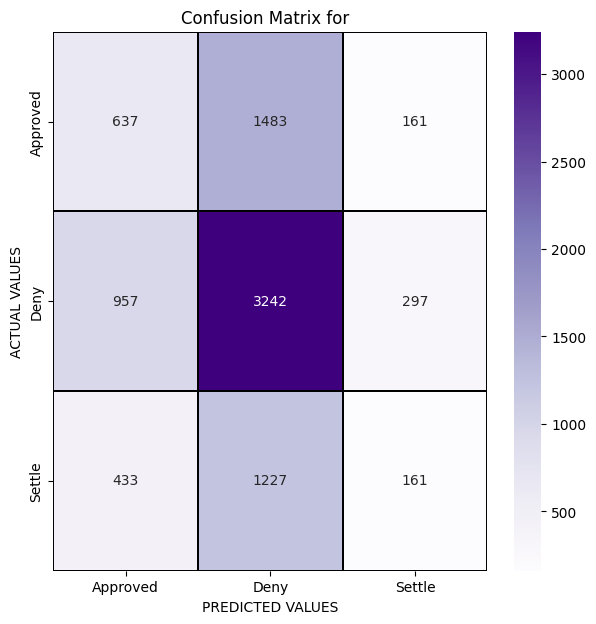

In [50]:
knn = KNeighborsClassifier(weights= 'uniform', n_neighbors= 9)

# Fit the model on the training data
knn.fit(x_train, y_train)

knn_acc = round(knn.score(x_test, y_test)*100,2)
print('Train Accuracy: {}%'.format(round(knn.score(x_train, y_train)*100,2)))
print("Test Accuracy: {}%".format(round(knn.score(x_test, y_test)*100,2)))
print()

# Use the model to make predictions on the testing data
y_pred = knn.predict(x_test)

# Calculate the accuracy of the model
print('Recall Score:', recall_score(y_test,y_pred,average='micro'))
print("Classification Report:\n", classification_report(y_test, y_pred))


#Confusion Matrix
cm = confusion_matrix(y_test,y_pred)
x_axis_labels = ['Approved','Deny','Settle']
y_axis_labels = ['Approved','Deny','Settle']
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED VALUES")
plt.ylabel("ACTUAL VALUES")
plt.title('Confusion Matrix for  ')
plt.show()

# Gradient Boosting Classifier

Train Accuracy: 54.4%
Test Accuracy: 53.41%

Recall Score: 0.5340776924866248
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.18      0.26      2281
           1       0.54      0.93      0.69      4496
           2       0.12      0.00      0.00      1821

    accuracy                           0.53      8598
   macro avg       0.38      0.37      0.32      8598
weighted avg       0.43      0.53      0.43      8598



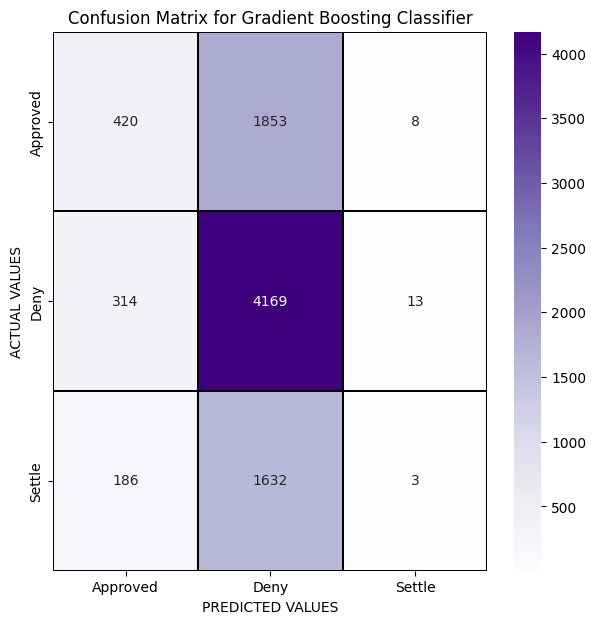

In [51]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the classifier
gb = GradientBoostingClassifier()

# Train the classifier on the training data
gb.fit(x_train, y_train)

print('Train Accuracy: {}%'.format(round(gb.score(x_train, y_train)*100,2)))
print("Test Accuracy: {}%".format(round(gb.score(x_test, y_test)*100,2)))
print()

# Make predictions on the testing data
y_pred = gb.predict(x_test)

# Evaluate the performance of the algorithm
print('Recall Score:', recall_score(y_test, y_pred, average='micro'))
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
x_axis_labels = ['Approved', 'Deny', 'Settle']
y_axis_labels = ['Approved', 'Deny', 'Settle']
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED VALUES")
plt.ylabel("ACTUAL VALUES")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()


### HyperParameter Tuning for Gradient boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=30)

# Define the hyperparameter grid to search
params_gb = {'max_depth': range(1,20),
             'max_leaf_nodes':range(1,20),
             'min_samples_leaf':range(2,30),
             'min_samples_split':range(4,40),
             'n_estimators':range(10,300)}

 #Create a RandomSearchCV object           
random_search = RandomizedSearchCV(gb, param_distributions=params_gb ,random_state=30, cv=5, scoring='accuracy', return_train_score=True)

# Fit the GridSearchCV object to the training data
random_search.fit(x_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validated score
print("Best parameters:", grid_search.best_params_)


Best parameters: {'n_estimators': 396, 'min_samples_split': 132, 'min_samples_leaf': 16, 'max_depth': 329}


#### Model after Hyperparameter tuning

Train Accuracy: 50.15%
Test Accuracy: 49.92%

Recall Score: 0.46917887880902537
Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.35      0.37      2281
           1       0.57      0.63      0.60      4496
           2       0.25      0.21      0.23      1821

    accuracy                           0.47      8598
   macro avg       0.40      0.40      0.40      8598
weighted avg       0.46      0.47      0.46      8598



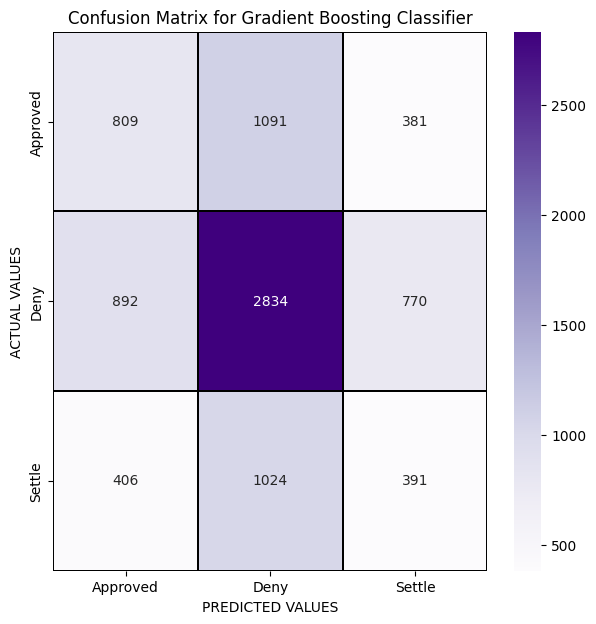

In [52]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the classifier
gb = GradientBoostingClassifier(n_estimators= 396, min_samples_split = 132, min_samples_leaf =  16, max_depth= 329)

# Train the classifier on the training data
gb.fit(x_train, y_train)

gb_acc = round(nb.score(x_test, y_test)*100,2)
print('Train Accuracy: {}%'.format(round(nb.score(x_train, y_train)*100,2)))
print("Test Accuracy: {}%".format(round(nb.score(x_test, y_test)*100,2)))
print()

# Make predictions on the testing data
y_pred = gb.predict(x_test)

gb_recall = recall_score(y_test, y_pred, average='micro')

# Evaluate the performance of the algorithm
print('Recall Score:', recall_score(y_test, y_pred, average='micro'))
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
x_axis_labels = ['Approved', 'Deny', 'Settle']
y_axis_labels = ['Approved', 'Deny', 'Settle']
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED VALUES")
plt.ylabel("ACTUAL VALUES")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()


# Choosing the Best Model

In [53]:
#Accuracy dataframe of models
accuracy_dict = {'Models':['Multinomial Naive Bayes','Logistic Regression','Decision Tree','Random Forest','Gradient Boosting','KNN'],'Test_accuracy_%':[nb_acc, log_acc, dt_acc, rf_acc, gb_acc, knn_acc]}
accuracy_df = pd.DataFrame(accuracy_dict)
accuracy_df

,Models,Test_accuracy_%
0,Multinomial Naive Bayes,49.92
1,Logistic Regression,52.71
2,Decision Tree,53.86
3,Random Forest,54.21
4,Gradient Boosting,49.92
5,KNN,46.99


In [54]:
# Recall dataframe of model
models = [('Multinomial Naive Bayes', nb), ('Logistic Regression', logreg), ('Decision Tree', dt), ('Random Forest', rf), ('Gradient Boosting', gb), ('KNN',knn)]
recalls = []
for name, model in models:
    y_pred = model.predict(x_test)
    recall = (recall_score(y_test, y_pred, average='micro'))*100
    recalls.append((name, recall))

# Create the DataFrame
recall_df = pd.DataFrame(recalls, columns=['Models', 'Recall Score %'])
recall_df


,Models,Recall Score %
0,Multinomial Naive Bayes,49.918586
1,Logistic Regression,52.709933
2,Decision Tree,53.861363
3,Random Forest,54.210281
4,Gradient Boosting,46.917888
5,KNN,46.987672


In [55]:
df = pd.merge(accuracy_df, recall_df, on='Models')
df

,Models,Test_accuracy_%,Recall Score %
0,Multinomial Naive Bayes,49.92,49.918586
1,Logistic Regression,52.71,52.709933
2,Decision Tree,53.86,53.861363
3,Random Forest,54.21,54.210281
4,Gradient Boosting,49.92,46.917888
5,KNN,46.99,46.987672


From the above confusion matrices it is clear that recall is important i.e. we need to reduce False-Positive value. 
- Why Recall? \
Because Even though it says the insurance claim is denied, it is predicting it as approved or settled, this is not good for business.

# Best recall score
**Random Forest Classifier** had the best overall metrics when compared to all other classifier.

# Using Testing data


In [56]:
test_data.head()

,Claim Number,Incident Date,Date Received,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured
0,6EYB31JGFR,21-09-2006,26-12-2006,PNQ,Pune,One Person Company,Property Loss,In Transit,Inventory - Finished Goods
1,HJLRXONE3R,15-01-2009,2009-11-02 00:00:00,PNQ,Pune,Limited Liability Parterneship (LLP),Property Loss,In Transit,Fixtures
2,IUOV99JA22,17-08-2005,2005-01-09 00:00:00,AMD,Ahmedabad,Private Limited Company,Property Loss,Warehouse,Inventory - Raw Material
3,BGOUHQ2LKK,15-02-2005,2005-01-06 00:00:00,DEL,Delhi,One Person Company,Property Damage,In Transit,Inventory - Finished Goods
4,HDCG60QET1,17-03-2003,2003-01-04 00:00:00,PNQ,Pune,Private Limited Company,Property Damage,In Transit,Misc. Electronic Items


In [57]:
test_data['Incident Date'] = pd.to_datetime(test_data['Incident Date'])
test_data['Date Received'] = pd.to_datetime(test_data['Date Received'])
test_data['Reporting Delay in Days'] = (test_data['Date Received'] - test_data['Incident Date']).dt.days
test_data.drop(['Claim Number','Incident Date', 'Date Received', 'City'], axis=1, inplace=True)

# Convert categorical variables into numerical format using LabelEncoder
le = LabelEncoder()
categorical_columns = ['City Code', 'Enterprise Type', 'Claim Type', 'Claim Site', 'Product Insured']
for column in categorical_columns:
    test_data[column] = le.fit_transform(test_data[column])

test_data.head()


,City Code,Enterprise Type,Claim Type,Claim Site,Product Insured,Reporting Delay in Days
0,19,5,1,0,4,96
1,19,3,1,0,1,291
2,1,7,1,2,5,-220
3,9,5,0,0,4,-40
4,19,7,0,0,7,-72


In [58]:
rf = RandomForestClassifier(n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_depth= 10,random_state=42)

# Train the classifier on the training data
rf.fit(x_train, y_train)

# Predict the class labels for the test data
predictions = rf.predict(test_data)


In [59]:
print(predictions)

[0 1 1 ... 1 1 1]


In [60]:
final_predictions = test_data.copy()
final_predictions['Predictions'] = predictions
final_predictions

,City Code,Enterprise Type,Claim Type,Claim Site,Product Insured,Reporting Delay in Days,Predictions
0,19,5,1,0,4,96,0
1,19,3,1,0,1,291,1
2,1,7,1,2,5,-220,1
3,9,5,0,0,4,-40,1
4,19,7,0,0,7,-72,1
...,...,...,...,...,...,...,...
3786,7,7,1,2,0,22,1
3787,16,12,1,0,11,19,1
3788,14,2,1,2,3,-96,1
3789,6,5,0,0,7,-213,1


- 0: Approved
- 1: Deny
- 2: Settle

In [61]:
pred = []
for i in predictions:
    if i==0:
        pred.append('Approved in Full')
    elif i==1:
        pred.append('Deny')
    else:
        pred.append('Settle')

In [62]:
pred[:5]

['Approved in Full', 'Deny', 'Deny', 'Deny', 'Deny']

In [72]:
test_prediction = pd.read_excel('/content/drive/MyDrive/Hackathon/test_data-1663477366404.xlsx')

In [73]:
test_prediction['Incident Date'] = pd.to_datetime(test_prediction['Incident Date'])
test_prediction['Date Received'] = pd.to_datetime(test_prediction['Date Received'])
#test_prediction['Reporting Delay in Days'] = (test_prediction['Date Received'] - test_prediction['Incident Date']).dt.days
#test_prediction.drop(['Claim Number','Incident Date', 'Date Received', 'City'], axis=1, inplace=True)


In [74]:
test_prediction['Predictions'] = pred
test_prediction

,Claim Number,Incident Date,Date Received,City Code,City,Enterprise Type,Claim Type,Claim Site,Product Insured,Predictions
0,6EYB31JGFR,2006-09-21,2006-12-26,PNQ,Pune,One Person Company,Property Loss,In Transit,Inventory - Finished Goods,Approved in Full
1,HJLRXONE3R,2009-01-15,2009-11-02,PNQ,Pune,Limited Liability Parterneship (LLP),Property Loss,In Transit,Fixtures,Deny
2,IUOV99JA22,2005-08-17,2005-01-09,AMD,Ahmedabad,Private Limited Company,Property Loss,Warehouse,Inventory - Raw Material,Deny
3,BGOUHQ2LKK,2005-02-15,2005-01-06,DEL,Delhi,One Person Company,Property Damage,In Transit,Inventory - Finished Goods,Deny
4,HDCG60QET1,2003-03-17,2003-01-04,PNQ,Pune,Private Limited Company,Property Damage,In Transit,Misc. Electronic Items,Deny
...,...,...,...,...,...,...,...,...,...,...
3786,IMQYY73AOP,2007-07-30,2007-08-21,CCU,Kolkata,Private Limited Company,Property Loss,Warehouse,Cameras and other Misc. Security Equipment,Deny
3787,2AR1OGIMH4,2004-08-21,2004-09-09,NGP,Nagpur,Sole Proprietorship,Property Loss,In Transit,"Property, Plant, and Equipment (PPE) Parts",Deny
3788,SB4IET2MO5,2005-05-13,2005-02-06,LKO,Lucknow,Joint-Venture Company,Property Loss,Warehouse,"Heating, ventilation, and air conditioning (HV...",Deny
3789,3IBWXQK04L,2004-11-04,2004-04-05,BOM,Mumbai,One Person Company,Property Damage,In Transit,Misc. Electronic Items,Deny


In [75]:
test_prediction['Predictions'].value_counts(normalize=True) *100

Deny                86.731733
Approved in Full    12.107623
Settle               1.160644
Name: Predictions, dtype: float64

In overall predictions for unseen data,

  - **Deny** was the most predicted value with **86.73%**
  - **Approved** in Full **12.11%**
  - **Settle 1.16%**

In [76]:
df_new = test_prediction[['Claim Number', 'Predictions']]

# Save the dataframe to a CSV file
df_new.to_csv('predictions.csv', index=False)